# Classification using scikit_learn

## Importing Libraries

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

## Loading & Exploring Dataset

In [79]:
df_churn_pd = pd.read_csv(
    "https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")
df_churn_pd.sample(2)

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
577,214,High,M,M,2,78554.2,N,17,5590.56,23,1397.640,139.7640,3.45,4,19,0.0,279.5280
198,1901,High,M,S,2,63152.6,Y,63,29932.99,40,14966.495,1496.6495,10.00,1,9,0.0,1496.6495


In [80]:
print("Basic dataset info :")
print(df_churn_pd.info())

Basic dataset info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2066 non-null   int64  
 1   CHURNRISK                  2066 non-null   object 
 2   GENDER                     2063 non-null   object 
 3   STATUS                     2066 non-null   object 
 4   CHILDREN                   2066 non-null   int64  
 5   ESTINCOME                  2066 non-null   float64
 6   HOMEOWNER                  2066 non-null   object 
 7   AGE                        2066 non-null   int64  
 8   TOTALDOLLARVALUETRADED     2066 non-null   float64
 9   TOTALUNITSTRADED           2066 non-null   int64  
 10  LARGESTSINGLETRANSACTION   2066 non-null   float64
 11  SMALLESTSINGLETRANSACTION  2066 non-null   float64
 12  PERCENTCHANGECALCULATION   2066 non-null   float64
 13  DAYSSINCELASTLOGIN         

The Gender column has 3 Null Values.

To explicity view the null values, we can run the following code:

In [81]:
print("Null Values in Each Column : \n" +str(df_churn_pd.isnull().sum()))

Null Values in Each Column : 
ID                           0
CHURNRISK                    0
GENDER                       3
STATUS                       0
CHILDREN                     0
ESTINCOME                    0
HOMEOWNER                    0
AGE                          0
TOTALDOLLARVALUETRADED       0
TOTALUNITSTRADED             0
LARGESTSINGLETRANSACTION     0
SMALLESTSINGLETRANSACTION    0
PERCENTCHANGECALCULATION     0
DAYSSINCELASTLOGIN           0
DAYSSINCELASTTRADE           0
NETREALIZEDGAINS_YTD         0
NETREALIZEDLOSSES_YTD        0
dtype: int64


## Frequency chart of Churn Risk

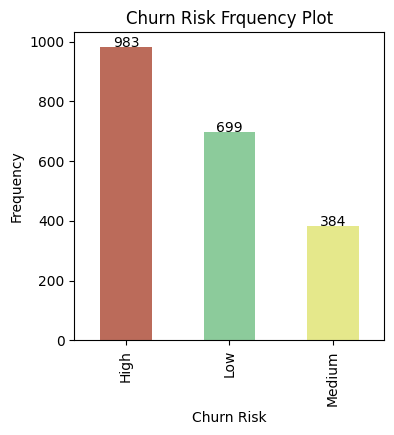

In [82]:
series_churnrisk_pd = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False)
churn_plot = series_churnrisk_pd.plot(kind='bar',
            figsize=(4,4),title="Churn Risk Frquency Plot", color=['#BB6B5A','#8CCB9B','#E5E88B'])
for i in range(len(series_churnrisk_pd)):
        churn_plot.text(i, series_churnrisk_pd.values[i], series_churnrisk_pd.values[i], ha = 'center')
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency");

## Data Preparation

In [83]:
#remove columns that are not required
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)

df_churn_pd.sample()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
1854,Low,M,M,1,64792.3,N,52,13051.31,36,6525.655,652.5655,9.0,2,8,652.5655,0.0


Gender has 3 missing values.

We will use [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to fill in the missing values by the `most_frequent` value in the series.

Columns such as GENDER, STATUS and HOMEOWNER are categorical columns. We can convert them into numbers using `OneHotEncoder` for better performance.

In [84]:
# Defining the categorical columns
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")

onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


The numerical columns from the data set are identified, and `StandardScaler` is applied to each of the columns. This way, each value is subtracted with the mean of its column and divided by its standard deviation.

In [85]:
# Defining the numerical columns
numericalColumns = df_churn_pd.select_dtypes(include=[float,int]).columns

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


 Each of the techniques are grouped by the columns they needed to be applied on and are queued using the `ColumnTransformer`.

 Ideally, this is run in the pipeline just before the model is trained.

 However, to understand what the data will look like, we have transformed the data into a temporary variable.

In [86]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")

preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),
                                                            ('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")


df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp)

df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp_2)

Data after transforming :
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming :
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


We need to convert the Churn Risk column values from str to numerical.

Each str in the churn risk column, represents a category, which is identified by a numerical label.

This is done using [`Label Encoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [87]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_encoder = LabelEncoder()
label = df_churn_pd['CHURNRISK']

label = label_encoder.fit_transform(label)

org_labels = label_encoder.inverse_transform(sorted(np.unique(label)))

print("Encoding : ")
for i in range(len(org_labels)):
  print(str(i)+" - "+org_labels[i])

print("\nEncoded value of Churnrisk after applying label encoder : " + str(label))

Encoding : 
0 - High
1 - Low
2 - Medium

Encoded value of Churnrisk after applying label encoder : [2 1 1 ... 2 1 1]


## Pie Chart of Gender

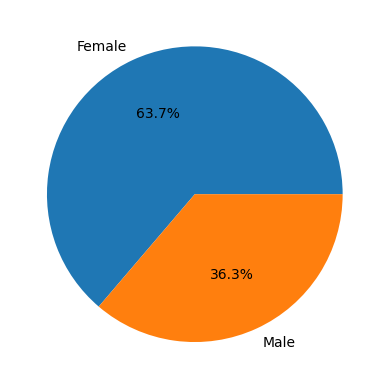

In [88]:
series_gender_pd = df_churn_pd["GENDER"].value_counts()
series_gender_pd.rename(index={'M':'Male', 'F':'Female'}, inplace=True)
fig, ax = plt.subplots()
ax.pie(series_gender_pd, autopct='%1.1f%%', labels = series_gender_pd.index)
plt.show()

## Churn Risk graphs based on
- Days since last trade
- Estimated Income
- Total Value Traded

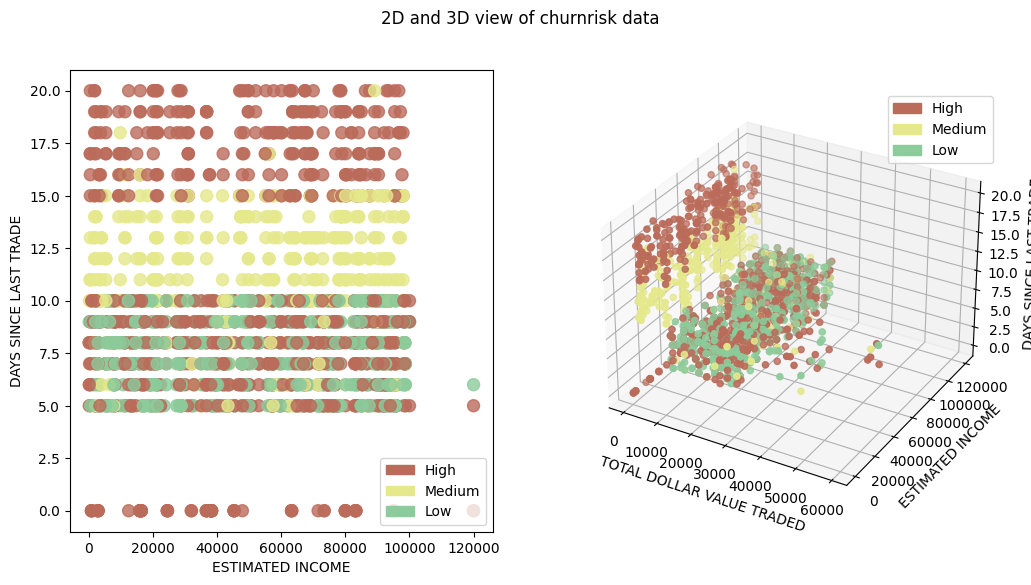

In [89]:
area = 75
x = df_churn_pd['ESTINCOME']
y = df_churn_pd['DAYSSINCELASTTRADE']
z = df_churn_pd['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()

## Splitting Training and Testing Data

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function parameters :

features = input variables

label = output variables

test_size = proportion of data to be used for testing

random_sate = a number that tells sklean how to split data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(features, label , test_size=0.20, random_state=0)
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1652, 15) Output label(1652,)
Dimensions of datasets that will be used for testing : Input features(414, 15) Output label(414,)


## Creating Random Forest Classification model

Among the various classification models, we are going to use Random Forest Classifier.

It is a Supervised Machine Learning Algorithm.

This model uses Bootstrapping to obtain random samples with replacement from the training data.

Collection of such samples, form a dataset. It represents the original data, but it's not exactly same.

Decision Trees are trained on various such datasets, using various subsets of features. These subsets of features are chosen randomly.

The majority voted by these decision trees, is used to make a prediction.

[`RandomForest Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Parmaeters:

- n_estimators: int, default=100
  
  Number of trees in the forest.

- max_depthint, default=None

  The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- bootstrapbool, default=True

  Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

- random_stateint, RandomState instance or None, default=None

  Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

In [91]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

## Assembling the steps using pipeline

Pipelines are used to design and automate the process of training models.

In [92]:
rfc_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', randomForestClassifier)])

## Train Random Forest Classifier Model

In [93]:
rfc_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'STATUS',
                                                   'HOMEOWNER']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=2, random_state=0))])

## Test Random Forest Classifier Model

In [94]:
y_pred_rfc = rfc_model.predict(X_test)

## Evaluate Random Forest Classifier Model

In [95]:
# returns an array with hashcodes of colors correponding to integral label of risk_list
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

# prints 2D plots for both actual and predicted data
def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2
    plt.subplots(ncols=2, figsize=(10,4))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()

x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Actual')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Predicted')

    plt.show()


def model_metrics(y_test,y_pred):

    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels = org_labels)
    cm_display.plot()
    plt.show()

    print("The classification report for the model : \n\n"+ classification_report(y_test, y_pred))

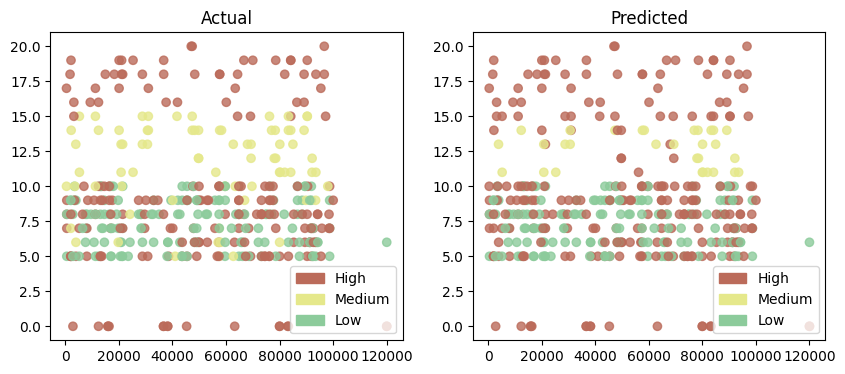

In [96]:
two_d_compare(y_test,y_pred_rfc,model_name)

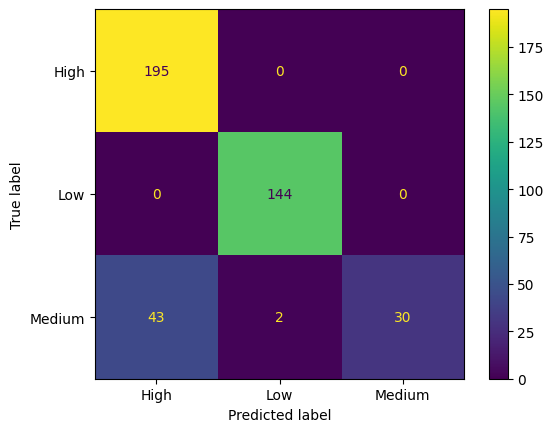

The classification report for the model : 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       195
           1       0.99      1.00      0.99       144
           2       1.00      0.40      0.57        75

    accuracy                           0.89       414
   macro avg       0.94      0.80      0.82       414
weighted avg       0.91      0.89      0.87       414



In [97]:
model_metrics(y_test,y_pred_rfc)

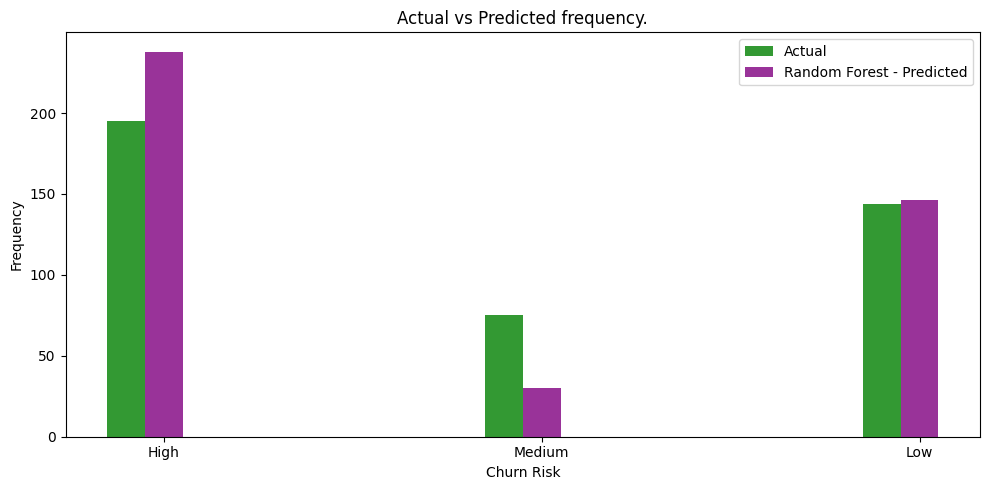

In [98]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects6 = plt.bar(index + bar_width, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()